In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import statistics
import time

# to ignore the warnings
from warnings import filterwarnings

In [23]:
scores_df = pd.read_excel('./data/game_scores.xlsx')
scores_df.head()

,date,visitor,home,visitor_points,home_points
0,2015-11-25T01:00:00.000Z,Boston Celtics,Atlanta Hawks,97.0,121.0
1,2016-04-09T23:30:00.000Z,Boston Celtics,Atlanta Hawks,107.0,118.0
2,2016-04-16T23:00:00.000Z,Boston Celtics,Atlanta Hawks,101.0,102.0
3,2016-04-19T23:00:00.000Z,Boston Celtics,Atlanta Hawks,72.0,89.0
4,2016-04-27T00:30:00.000Z,Boston Celtics,Atlanta Hawks,83.0,110.0


In [24]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14242 entries, 0 to 14241
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            14242 non-null  object 
 1   visitor         14242 non-null  object 
 2   home            14242 non-null  object 
 3   visitor_points  12744 non-null  float64
 4   home_points     12744 non-null  float64
dtypes: float64(2), object(3)
memory usage: 556.5+ KB


In [25]:
# Find columns and total null values
scores_df.isnull().sum()

date                 0
visitor              0
home                 0
visitor_points    1498
home_points       1498
dtype: int64

In [26]:
# Convert date object to datetime data type
scores_df['date'] = pd.to_datetime(scores_df['date'], errors='coerce')
scores_df.dtypes

date              datetime64[ns, UTC]
visitor                        object
home                           object
visitor_points                float64
home_points                   float64
dtype: object

In [27]:
# Find rows that contain null values
scores_df[scores_df['visitor_points'].isnull()]

,date,visitor,home,visitor_points,home_points
23,2024-11-05 00:45:00+00:00,Boston Celtics,Atlanta Hawks,NaN,NaN
46,2024-11-13 00:00:00+00:00,Atlanta Hawks,Boston Celtics,NaN,NaN
47,2025-01-19 00:00:00+00:00,Atlanta Hawks,Boston Celtics,NaN,NaN
82,2025-03-16 22:00:00+00:00,Atlanta Hawks,Brooklyn Nets,NaN,NaN
83,2025-04-10 23:30:00+00:00,Atlanta Hawks,Brooklyn Nets,NaN,NaN
...,...,...,...,...,...
14210,NaT,Toronto Raptors,Washington Wizards,NaN,NaN
14220,2025-01-30 00:00:00+00:00,Toronto Raptors,Washington Wizards,NaN,NaN
14221,2025-03-24 23:00:00+00:00,Toronto Raptors,Washington Wizards,NaN,NaN
14231,2025-03-06 00:00:00+00:00,Utah Jazz,Washington Wizards,NaN,NaN


In [29]:
# Drop all rows that have no points for either team
df = scores_df.dropna()

# Display
df.isnull().sum()

date              0
visitor           0
home              0
visitor_points    0
home_points       0
dtype: int64

In [30]:
teams = [team for team in df['visitor'].unique()]
teams
    

['Boston Celtics',
 'Atlanta Hawks',
 'Brooklyn Nets',
 'Charlotte Hornets',
 'Chicago Bulls',
 'Cleveland Cavaliers',
 'Dallas Mavericks',
 'Denver Nuggets',
 'Detroit Pistons',
 'Golden State Warriors',
 'Houston Rockets',
 'Indiana Pacers',
 'LA Clippers',
 'Los Angeles Lakers',
 'Memphis Grizzlies',
 'Miami Heat',
 'Milwaukee Bucks',
 'Minnesota Timberwolves',
 'New Orleans Pelicans',
 'New York Knicks',
 'Oklahoma City Thunder',
 'Orlando Magic',
 'Philadelphia 76ers',
 'Phoenix Suns',
 'Portland Trail Blazers',
 'Sacramento Kings',
 'San Antonio Spurs',
 'Toronto Raptors',
 'Utah Jazz',
 'Washington Wizards']

# NBA Team Analysis

Enter the away team:  New York Knicks
Enter the home team:  Detroit Pistons
Enter the first line for the over/under bet:  209.5
Enter the lower range:  213.5
Enter the upper range:  221.5


C:\Users\User\AppData\Local\Temp\ipykernel_23944\4266321095.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=matchup_game, x='winner', ax=axes[1], palette='Set2')


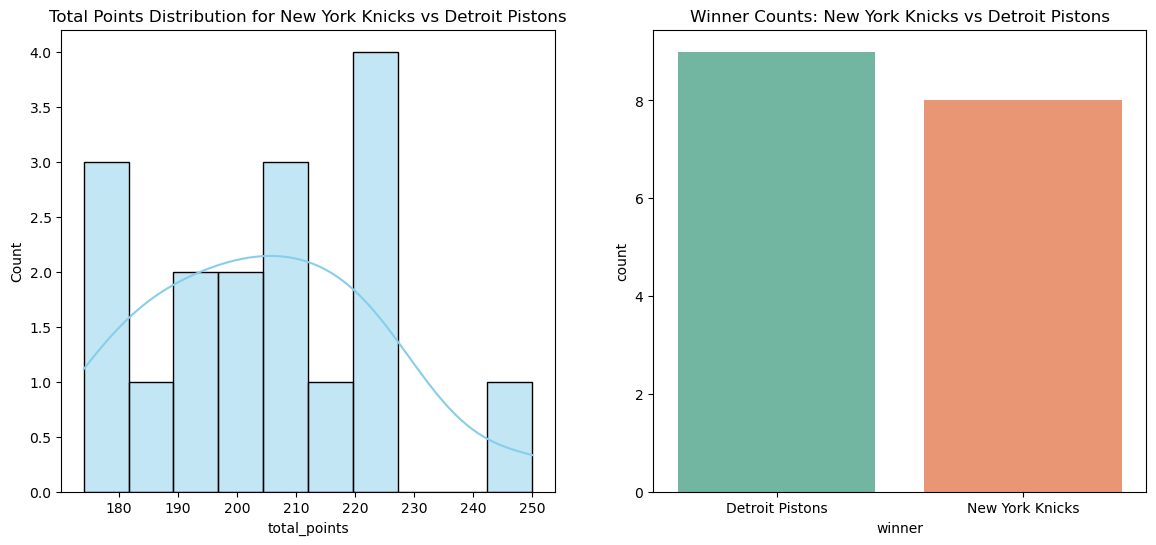

Statistics of New York Knicks vs Detroit Pistons
------------------------------------
Mean: 204.58823529411765
Standard Deviation: 20.08438082045788
------------------------------------
z-score for 209.5: 0.24
z-score for 210.5: 0.29
z-score for 211.5: 0.34
z-score for 212.5: 0.39
z-score for 213.5: 0.44
z-score for 214.5: 0.49
z-score for 215.5: 0.54
z-score for 216.5: 0.59
z-score for 217.5: 0.64
z-score for 218.5: 0.69
z-score for 219.5: 0.74
z-score for 220.5: 0.79
z-score for 221.5: 0.84
z-score for 222.5: 0.89
z-score for 223.5: 0.94
------------------------------------
Percentage of games with total scores between 213.5 and 221.5: 11.76%
------------------------------------


,date,visitor,home,visitor_points,home_points,total_points,winner
6948,2016-02-05 00:00:00+00:00,New York Knicks,Detroit Pistons,105.0,111.0,216.0,Detroit Pistons
6949,2016-11-01 23:30:00+00:00,New York Knicks,Detroit Pistons,89.0,102.0,191.0,Detroit Pistons
6950,2017-03-11 22:00:00+00:00,New York Knicks,Detroit Pistons,92.0,112.0,204.0,Detroit Pistons
6951,2017-12-23 00:00:00+00:00,New York Knicks,Detroit Pistons,101.0,104.0,205.0,Detroit Pistons
6952,2018-11-28 00:00:00+00:00,New York Knicks,Detroit Pistons,108.0,115.0,223.0,Detroit Pistons
6953,2019-02-09 00:00:00+00:00,New York Knicks,Detroit Pistons,103.0,120.0,223.0,Detroit Pistons
6954,2019-11-07 00:00:00+00:00,New York Knicks,Detroit Pistons,102.0,122.0,224.0,Detroit Pistons
6955,2020-02-09 00:00:00+00:00,New York Knicks,Detroit Pistons,95.0,92.0,187.0,New York Knicks
6956,2021-03-01 01:00:00+00:00,New York Knicks,Detroit Pistons,109.0,90.0,199.0,New York Knicks
6957,2020-12-12 00:00:00+00:00,New York Knicks,Detroit Pistons,90.0,84.0,174.0,New York Knicks


In [151]:
def possible_outcome(dataframe, away_team, home_team, first_line, lower_bound, upper_bound): 
    # Filter the dataframe for the specific matchup
    matchup_game = dataframe.loc[(dataframe['visitor'] == away_team) & (dataframe['home'] == home_team)].copy()
    
    # Add a 'total_points' column 
    matchup_game['total_points'] = matchup_game['visitor_points'] + matchup_game['home_points']
    
    # Determine the winner
    matchup_game['winner'] = matchup_game.apply(lambda row: home_team if row['home_points'] > row['visitor_points']  else away_team, axis=1)
    
    # Create side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
      
    # Plot total points distribution with a KDE
    sns.histplot(data=matchup_game, x='total_points', bins=10, kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f'Total Points Distribution for {away_team} vs {home_team}')
    
    # Plot the winner count    
    sns.countplot(data=matchup_game, x='winner', ax=axes[1], palette='Set2')
    axes[1].set_title(f'Winner Counts: {away_team} vs {home_team}')
        
    # Display the plots
    plt.show()
    
     # Calculate a z-score from a provided mean and standard deviation
    mean = matchup_game['total_points'].mean()
    standard_deviation = matchup_game['total_points'].std()
   
    # Create array of UNDER/OVER values starting with given first line
    under_over_lines = [first_line + i for i in range(15)]
    
    # Display basic statics of team matchup
    print(f'Statistics of {away_team} vs {home_team}')
    print('------------------------------------')
    print(f'Mean: {mean}')
    print(f'Standard Deviation: {standard_deviation}')

    print('------------------------------------')
    # Display the z-scores for each line score
    for line in under_over_lines:
        zscore = statistics.NormalDist(mean, standard_deviation).zscore(line)
        print(f'z-score for {line}: {zscore:.2f}')

    print('------------------------------------')

    # Find percentage of games between specified range
    total_games = len(matchup_game)
    games_in_range = matchup_game[(matchup_game['total_points'] >= lower_bound) & (matchup_game['total_points'] <= upper_bound)]
    percentage = (len(games_in_range) / total_games) * 100
    print(f"Percentage of games with total scores between {lower_bound} and {upper_bound}: {percentage:.2f}%")
    print('------------------------------------')
    
    return matchup_game

away_team = input("Enter the away team: ")
home_team = input("Enter the home team: ")
first_line = float(input("Enter the first line for the over/under bet: "))
lower_bound = float(input("Enter the lower range: "))
upper_bound = float(input("Enter the upper range: "))



possible_outcome(df, away_team, home_team, first_line, lower_bound, upper_bound)